In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def impulse(n : np.array, A: float, n0: float) -> np.array:
    """Função para gerar sinais impulsivos

    Args:
        n (np.array): array de valores numpy
        A (float): amplitude do sinal impulso
        n0 (float): atraso ou avanço do instante de tempo do impulso

    Returns:
        d (np.array): sinal impulso de amplitude A e deslocado em n0
    """
    d = np.zeros(N)
    ind = np.where(n==n0)
    d[ind] = A
    return d

def sum_impulsive_signals(values: list) -> np.array:
    """Função compõe um sinal a partir de sinais de impulso

    Args:
        values (list): lista de sinais impulsivos

    Returns:
        np.array: sinal
    """
    return sum(values)


def convolution(x : list, nx : list, h : list, nh : list) -> list:
    """Função que realiza a convolução de dois sinais discretos x[n], h[n]

    Args:
        x (list): Sinal x[n] em formato de array.
        nx (list): indices do sinal x[n] que armazena os instantes de tempos para cada sinal em x[n].
        h (list): Sinal h[n] em formato de array.
        nh (list): indices do sinal h[n] que armazena os instantes de tempos para cada sinal em h[n].

    Returns:
        y (list): Sinal resultado da convolução, isto é, y[n].
        ny (list): indices do sinal y[n] que armazena os instantes de tempos para cada sinal em y[n].
    """
    lx = len(x)
    lh = len(h)

    y = []

    ny = []

    for n in range(lx):
        for k in range(lh):
            if nx[n] + nh[k] not in ny:
                ny.append(nx[n] + nh[k])
                y.append(x[n]*h[k])
            else:
                idx = ny.index(nx[n]+nh[k])
                y[idx] += (x[n]*h[k])
    return y, ny

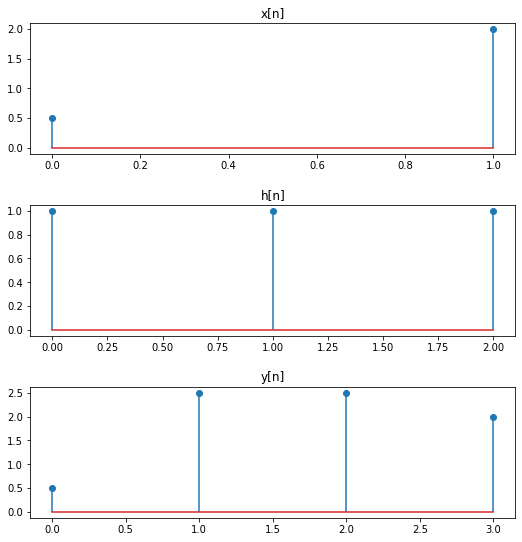

In [126]:
# x[n]
x = [0.5, 2]
nx = [0,1]

# h[n]
h = [1, 1, 1]
nh = [0,1,2]

y, ny = convolution(x,nx,h,nh)

fig, ax = plt.subplots(3, 1, figsize=(8,8))

fig.tight_layout(pad=3.0)

ax[0].stem(nx, x)
# ax[0].set_xlim([-10, 10])
ax[0].title.set_text('x[n]')
ax[1].stem(nh, h)
# ax[1].set_xlim([-10, 10])
ax[1].title.set_text('h[n]')
ax[2].stem(ny, y)
# ax[2].set_xlim([-10, 10])
ax[2].title.set_text('y[n]')


plt.show()